In [1]:
import numpy as np
import mne
# PYHRV IMPORTS
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.tools as tools
#from pecg import Preprocessing as Pre
# MATH
import math

# SKLEARN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# PANDAS
import pandas as pd
import csv
import matplotlib.pyplot as plt
seed=1234

# Taking data out of files #

In [2]:
file_1M1 = "ECG_data/01M_1_edited.edf"
data_1M1 = mne.io.read_raw_edf(file_1M1)
raw_data_1M1 = data_1M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_1M1 = data_1M1.info
channels_1M1 = data_1M1.ch_names
events_1M1 = mne.events_from_annotations(data_1M1)[0]
print(info_1M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\01M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:47:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [3]:
file_1M2 = "ECG_data/01M_2_edited.edf"
data_1M2 = mne.io.read_raw_edf(file_1M2)
raw_data_1M2 = data_1M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_1M2 = data_1M2.info
channels_1M2 = data_1M2.ch_names
events_1M2 = mne.events_from_annotations(data_1M2)[0]
print(info_1M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\01M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:52:38 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [4]:
file_2F1 = "ECG_data/02F_1_edited.edf"
data_2F1 = mne.io.read_raw_edf(file_2F1)
raw_data_2F1 = data_2F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_2F1 = data_2F1.info
channels_2F1 = data_2F1.ch_names
events_2F1 = mne.events_from_annotations(data_2F1)[0]
print(info_2F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\02F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:44:00 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [5]:
file_2F2 = "ECG_data/02F_2_edited.edf"
data_2F2 = mne.io.read_raw_edf(file_2F2)
raw_data_2F2 = data_2F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_2F2 = data_2F2.info
channels_2F2 = data_2F2.ch_names
events_2F2 = mne.events_from_annotations(data_2F2)[0]
print(info_2F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\02F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:58 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [6]:
file_3F1 = "ECG_data/03F_1_edited.edf"
data_3F1 = mne.io.read_raw_edf(file_3F1)
raw_data_3F1 = data_3F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_3F1 = data_3F1.info
channels_3F1 = data_3F1.ch_names
events_3F1 = mne.events_from_annotations(data_3F1)[0]
print(info_3F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\03F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:12:18 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [7]:
file_3F2 = "ECG_data/03F_2_edited.edf"
data_3F2 = mne.io.read_raw_edf(file_3F2)
raw_data_3F2 = data_3F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_3F2 = data_3F2.info
channels_3F2 = data_3F2.ch_names
events_3F2 = mne.events_from_annotations(data_3F2)[0]
print(info_3F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\03F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:43:22 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [8]:
file_4M1 = "ECG_data/04M_1_edited.edf"
data_4M1 = mne.io.read_raw_edf(file_4M1)
raw_data_4M1 = data_4M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_4M1 = data_4M1.info
channels_4M1 = data_4M1.ch_names
events_4M1 = mne.events_from_annotations(data_4M1)[0]
print(info_4M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\04M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:58:50 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [9]:
file_4M2 = "ECG_data/04M_2_edited.edf"
data_4M2 = mne.io.read_raw_edf(file_4M2)
raw_data_4M2 = data_4M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_4M2 = data_4M2.info
channels_4M2 = data_4M2.ch_names
events_4M2 = mne.events_from_annotations(data_4M2)[0]
print(info_4M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\04M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:38:05 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [10]:
file_5M1 = "ECG_data/05M_1_edited.edf"
data_5M1 = mne.io.read_raw_edf(file_5M1)
raw_data_5M1 = data_5M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_5M1 = data_5M1.info
channels_5M1 = data_5M1.ch_names
events_5M1 = mne.events_from_annotations(data_5M1)[0]
print(info_5M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\05M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:38:38 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [11]:
file_5M2 = "ECG_data/05M_2_edited.edf"
data_5M2 = mne.io.read_raw_edf(file_5M2)
raw_data_5M2 = data_5M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_5M2 = data_5M2.info
channels_5M2 = data_5M2.ch_names
events_5M2 = mne.events_from_annotations(data_5M2)[0]
print(info_5M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\05M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:59:56 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [12]:
file_6M1 = "ECG_data/06M_1_edited.edf"
data_6M1 = mne.io.read_raw_edf(file_6M1)
raw_data_6M1 = data_6M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_6M1 = data_6M1.info
channels_6M1 = data_6M1.ch_names
events_6M1 = mne.events_from_annotations(data_6M1)[0]
print(info_6M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\06M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:43:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [13]:
file_6M2 = "ECG_data/06M_2_edited.edf"
data_6M2 = mne.io.read_raw_edf(file_6M2)
raw_data_6M2 = data_6M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_6M2 = data_6M2.info
channels_6M2 = data_6M2.ch_names
events_6M2 = mne.events_from_annotations(data_6M2)[0]
print(info_6M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\06M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:17:25 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [14]:
file_7F1 = "ECG_data/07F_1_edited.edf"
data_7F1 = mne.io.read_raw_edf(file_7F1)
raw_data_7F1 = data_7F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_7F1 = data_7F1.info
channels_7F1 = data_7F1.ch_names
events_7F1 = mne.events_from_annotations(data_7F1)[0]
print(info_7F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\07F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:57:50 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [15]:
file_7F2 = "ECG_data/07F_2_edited.edf"
data_7F2 = mne.io.read_raw_edf(file_7F2)
raw_data_7F2 = data_7F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_7F2 = data_7F2.info
channels_7F2 = data_7F2.ch_names
events_7F2 = mne.events_from_annotations(data_7F2)[0]
print(info_7F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\07F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:48 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [16]:
file_8M1 = "ECG_data/08M_1_edited.edf"
data_8M1 = mne.io.read_raw_edf(file_8M1)
raw_data_8M1 = data_8M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_8M1 = data_8M1.info
channels_8M1 = data_8M1.ch_names
events_8M1 = mne.events_from_annotations(data_8M1)[0]
print(info_8M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\08M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:07 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [17]:
file_8M2 = "ECG_data/08M_2_edited.edf"
data_8M2 = mne.io.read_raw_edf(file_8M2)
raw_data_8M2 = data_8M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_8M2 = data_8M2.info
channels_8M2 = data_8M2.ch_names
events_8M2 = mne.events_from_annotations(data_8M2)[0]
print(info_8M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\08M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:54:36 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [18]:
file_9M1 = "ECG_data/09M_1_edited.edf"
data_9M1 = mne.io.read_raw_edf(file_9M1)
raw_data_9M1 = data_9M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_9M1 = data_9M1.info
channels_9M1 = data_9M1.ch_names
events_9M1 = mne.events_from_annotations(data_9M1)[0]
print(info_9M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\09M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:46:02 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [19]:
file_9M2 = "ECG_data/09M_2_edited.edf"
data_9M2 = mne.io.read_raw_edf(file_9M2)
raw_data_9M2 = data_9M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_9M2 = data_9M2.info
channels_9M2 = data_9M2.ch_names
events_9M2 = mne.events_from_annotations(data_9M2)[0]
print(info_9M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\09M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:52:30 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [20]:
file_10M1 = "ECG_data/10M_1_edited.edf"
data_10M1 = mne.io.read_raw_edf(file_10M1)
raw_data_10M1 = data_10M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_10M1 = data_10M1.info
channels_10M1 = data_10M1.ch_names
events_10M1 = mne.events_from_annotations(data_10M1)[0]
print(info_10M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\10M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:06:40 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [21]:
file_10M2 = "ECG_data/10M_2_edited.edf"
data_10M2 = mne.io.read_raw_edf(file_10M2)
raw_data_10M2 = data_10M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_10M2 = data_10M2.info
channels_10M2 = data_10M2.ch_names
events_10M2 = mne.events_from_annotations(data_10M2)[0]
print(info_10M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\10M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:50:21 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


# Get Raw ECG Signal #

In [22]:
print(len(events_1M1))
raw_ecg_1M1 = raw_data_1M1[6]
print(len(raw_ecg_1M1))

26
935040


In [23]:
print(len(events_1M2))
raw_ecg_1M2 = raw_data_1M2[6]
print(len(raw_ecg_1M2))

58
931200


In [24]:
print(len(events_2F1))
raw_ecg_2F1 = raw_data_2F1[6]
print(len(raw_ecg_2F1))

37
944640


In [25]:
print(len(events_2F2))
raw_ecg_2F2 = raw_data_2F2[6]
print(len(raw_ecg_2F2))

29
929280


In [26]:
print(len(events_3F1))
raw_ecg_3F1 = raw_data_3F1[6]
print(len(raw_ecg_3F1))

86
935040


In [27]:
print(len(events_3F2))
raw_ecg_3F2 = raw_data_3F2[6]
print(len(raw_ecg_3F2))

96
940800


In [28]:
print(len(events_4M1))
raw_ecg_4M1 = raw_data_4M1[6]
print(len(raw_ecg_4M1))

36
887040


In [29]:
print(len(events_4M2))
raw_ecg_4M2 = raw_data_4M2[6]
print(len(raw_ecg_4M2))

46
923520


In [30]:
print(len(events_5M1))
raw_ecg_5M1 = raw_data_5M1[6]
print(len(raw_ecg_5M1))

25
927360


In [31]:
print(len(events_5M2))
raw_ecg_5M2 = raw_data_5M2[6]
print(len(raw_ecg_5M2))

39
927360


In [32]:
print(len(events_6M1))
raw_ecg_6M1 = raw_data_6M1[6]
print(len(raw_ecg_6M1))

36
923520


In [33]:
print(len(events_6M2))
raw_ecg_6M2 = raw_data_6M2[6]
print(len(raw_ecg_6M2))

19
938880


In [34]:
print(len(events_7F1))
raw_ecg_7F1 = raw_data_7F1[6]
print(len(raw_ecg_7F1))

90
933120


In [35]:
print(len(events_7F2))
raw_ecg_7F2 = raw_data_7F2[6]
print(len(raw_ecg_7F2))

162
931200


In [36]:
print(len(events_8M1))
raw_ecg_8M1 = raw_data_8M1[6]
print(len(raw_ecg_8M1))

5
925440


In [37]:
print(len(events_8M2))
raw_ecg_8M2 = raw_data_8M2[6]
print(len(raw_ecg_8M2))

8
925440


In [38]:
print(len(events_9M1))
raw_ecg_9M1 = raw_data_9M1[6]
print(len(raw_ecg_9M1))

2
925440


In [39]:
print(len(events_9M2))
raw_ecg_9M2 = raw_data_9M2[6]
print(len(raw_ecg_9M2))

5
927360


In [40]:
print(len(events_10M1))
raw_ecg_10M1 = raw_data_10M1[6]
print(len(raw_ecg_10M1))

3
925440


In [41]:
print(len(events_10M2))
raw_ecg_10M2 = raw_data_10M2[6]
print(len(raw_ecg_10M2))

8
927360


# Get Event Series #

In [42]:
print(len(raw_ecg_1M1))
all_event_series = []
print(events_1M1)
all_event_series = []
all_event_series.append(raw_ecg_1M1[7*128:896+120*128])
for event in events_1M1[1:-2]:
    all_event_series.append(raw_ecg_1M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_1M1[len(raw_ecg_1M1)-(120*128):])
print(len(all_event_series))

935040
[[  1024      0      1]
 [193280      0      1]
 [274304      0      1]
 [285312      0      1]
 [300032      0      1]
 [316288      0      1]
 [324480      0      1]
 [343808      0      1]
 [384256      0      1]
 [399488      0      1]
 [410880      0      1]
 [429440      0      1]
 [504832      0      1]
 [524928      0      1]
 [532608      0      1]
 [559488      0      1]
 [577536      0      1]
 [589568      0      1]
 [604800      0      1]
 [625664      0      1]
 [633088      0      1]
 [651776      0      1]
 [873856      0      1]
 [887936      0      1]
 [932352      0      1]
 [933632      0      1]]
25


In [43]:
print(len(raw_ecg_1M2))
print(events_1M2)
all_event_series.append(raw_ecg_1M2[9*128:9*128+120*128])
for event in events_1M2[1:-3]:
    all_event_series.append(raw_ecg_1M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_1M2[len(raw_ecg_1M2)-(120*128):])
print(len(all_event_series))

931200
[[  1664      0      1]
 [ 71168      0      1]
 [ 92032      0      1]
 [100736      0      1]
 [106624      0      1]
 [115200      0      1]
 [136448      0      1]
 [149632      0      1]
 [156160      0      1]
 [159744      0      1]
 [167168      0      1]
 [174720      0      1]
 [176896      0      1]
 [182272      0      1]
 [190336      0      1]
 [193152      0      1]
 [198784      0      1]
 [208384      0      1]
 [216320      0      1]
 [223872      0      1]
 [231808      0      1]
 [234368      0      1]
 [241536      0      1]
 [247040      0      1]
 [269696      0      1]
 [316160      0      1]
 [332928      0      1]
 [350208      0      1]
 [391808      0      1]
 [406400      0      1]
 [417920      0      1]
 [439424      0      1]
 [460288      0      1]
 [467840      0      1]
 [474496      0      1]
 [502400      0      1]
 [506752      0      1]
 [511232      0      1]
 [514176      0      1]
 [525056      0      1]
 [548224      0      1]
 [561152 

In [44]:
print(len(raw_ecg_2F1))
print(events_2F1)
all_event_series.append(raw_ecg_2F1[8*128:8*128+120*128])
for event in events_2F1[1:-2]:
    all_event_series.append(raw_ecg_2F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_2F1[len(raw_ecg_2F1)-(120*128):])
print(len(all_event_series))

944640
[[  1024      0      1]
 [ 28928      0      1]
 [ 48384      0      1]
 [ 49408      0      1]
 [ 79104      0      1]
 [175872      0      1]
 [196480      0      1]
 [201856      0      1]
 [282496      0      1]
 [321152      0      1]
 [344832      0      1]
 [371200      0      1]
 [388096      0      1]
 [414592      0      1]
 [584320      0      1]
 [596992      0      1]
 [598016      0      1]
 [618368      0      1]
 [639872      0      1]
 [646272      0      1]
 [649344      0      1]
 [654976      0      1]
 [668032      0      1]
 [676352      0      1]
 [678144      0      1]
 [694656      0      1]
 [701184      0      1]
 [705536      0      1]
 [707072      0      1]
 [709504      0      1]
 [725376      0      1]
 [725632      0      1]
 [747904      0      1]
 [809216      0      1]
 [817920      0      1]
 [942080      0      1]
 [942336      0      1]]
117


In [45]:
print(len(raw_ecg_2F2))
print(events_2F2)
print(len(events_2F2))
all_event_series.append(raw_ecg_2F2[3*128:3*128+120*128])
print(events_2F2[0])
for event in events_2F2[1:]:
    all_event_series.append(raw_ecg_2F2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

929280
[[   896      0      1]
 [ 61696      0      1]
 [ 80000      0      1]
 [188928      0      1]
 [409984      0      1]
 [416896      0      1]
 [435584      0      1]
 [448256      0      1]
 [463872      0      1]
 [469248      0      1]
 [476544      0      1]
 [484608      0      1]
 [548736      0      1]
 [557184      0      1]
 [559744      0      1]
 [571904      0      1]
 [573184      0      1]
 [590336      0      1]
 [622208      0      1]
 [711936      0      1]
 [723072      0      1]
 [725248      0      1]
 [737280      0      1]
 [739328      0      1]
 [741632      0      1]
 [754432      0      1]
 [816000      0      1]
 [832640      0      1]
 [854400      0      1]]
29
[896   0   1]
146


In [46]:
print(len(raw_ecg_3F1))
print(events_3F1)
print(len(events_3F1))
all_event_series.append(raw_ecg_3F1[0:120*128])
for event in events_3F1[1:-1]:
    all_event_series.append(raw_ecg_3F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_3F1[len(raw_ecg_3F1)-(120*128):])
print(len(all_event_series))

935040
[[   384      0      1]
 [101760      0      1]
 [204672      0      1]
 [216832      0      1]
 [220928      0      1]
 [229504      0      1]
 [252672      0      1]
 [256512      0      1]
 [262912      0      1]
 [270336      0      1]
 [274176      0      1]
 [283648      0      1]
 [292608      0      1]
 [299648      0      1]
 [311808      0      1]
 [317440      0      1]
 [328960      0      1]
 [333824      0      1]
 [356096      0      1]
 [363136      0      1]
 [371456      0      1]
 [403968      0      1]
 [411136      0      1]
 [425728      0      1]
 [433280      0      1]
 [441728      0      1]
 [455040      0      1]
 [461440      0      1]
 [464512      0      1]
 [466688      0      1]
 [473472      0      1]
 [481920      0      1]
 [489216      0      1]
 [491904      0      1]
 [497664      0      1]
 [502400      0      1]
 [505472      0      1]
 [513408      0      1]
 [517888      0      1]
 [520576      0      1]
 [536960      0      1]
 [541952 

In [47]:
print(len(raw_ecg_3F2))
print(events_3F2)
print(len(events_3F2))
all_event_series.append(raw_ecg_3F2[6*128:6*128+120*128])
for event in events_3F2[1:-2]:
    all_event_series.append(raw_ecg_3F2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_3F2[len(raw_ecg_3F2)-(120*128):])
print(len(all_event_series))

940800
[[   896      0      1]
 [ 83456      0      1]
 [ 88448      0      1]
 [ 94720      0      1]
 [ 98560      0      1]
 [106624      0      1]
 [132480      0      1]
 [141952      0      1]
 [144768      0      1]
 [151552      0      1]
 [153088      0      1]
 [156160      0      1]
 [158336      0      1]
 [159616      0      1]
 [165120      0      1]
 [166784      0      1]
 [170880      0      1]
 [176384      0      1]
 [178432      0      1]
 [183552      0      1]
 [186112      0      1]
 [188928      0      1]
 [190464      0      1]
 [194176      0      1]
 [196096      0      1]
 [198400      0      1]
 [201472      0      1]
 [204672      0      1]
 [206720      0      1]
 [208512      0      1]
 [210816      0      1]
 [214400      0      1]
 [216448      0      1]
 [218752      0      1]
 [220800      0      1]
 [222976      0      1]
 [225920      0      1]
 [227328      0      1]
 [229120      0      1]
 [231552      0      1]
 [232320      0      1]
 [235520 

In [48]:
print(len(raw_ecg_4M1))
print(events_4M1)
print(len(events_4M1))
all_event_series.append(raw_ecg_4M1[8*128:8*128+120*128])
for event in events_4M1[1:]:
    all_event_series.append(raw_ecg_4M1[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

887040
[[  1024      0      1]
 [ 50304      0      1]
 [ 73472      0      1]
 [ 79488      0      1]
 [ 88960      0      1]
 [111616      0      1]
 [121088      0      1]
 [131456      0      1]
 [141312      0      1]
 [149120      0      1]
 [153344      0      1]
 [179968      0      1]
 [194176      0      1]
 [201216      0      1]
 [239616      0      1]
 [248576      0      1]
 [288640      0      1]
 [326144      0      1]
 [351872      0      1]
 [379776      0      1]
 [389376      0      1]
 [401536      0      1]
 [425344      0      1]
 [435072      0      1]
 [509056      0      1]
 [519040      0      1]
 [557952      0      1]
 [560640      0      1]
 [573312      0      1]
 [607104      0      1]
 [625280      0      1]
 [632576      0      1]
 [643200      0      1]
 [649984      0      1]
 [721024      0      1]
 [738048      0      1]]
36
363


In [49]:
print(len(raw_ecg_4M2))
print(events_4M2)
print(len(events_4M2))
all_event_series.append(raw_ecg_4M2[12*128:12*128+120*128])
for event in events_4M2[1:-1]:
    all_event_series.append(raw_ecg_4M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_4M2[len(raw_ecg_4M2)-(120*128):])
print(len(all_event_series))

923520
[[  1792      0      1]
 [ 13568      0      1]
 [ 82688      0      1]
 [ 97792      0      1]
 [113536      0      1]
 [118144      0      1]
 [135168      0      1]
 [186240      0      1]
 [204672      0      1]
 [241152      0      1]
 [275968      0      1]
 [307200      0      1]
 [313600      0      1]
 [325760      0      1]
 [331264      0      1]
 [337408      0      1]
 [342272      0      1]
 [350592      0      1]
 [358400      0      1]
 [374912      0      1]
 [385152      0      1]
 [389632      0      1]
 [407040      0      1]
 [439424      0      1]
 [441472      0      1]
 [449664      0      1]
 [478080      0      1]
 [483456      0      1]
 [497536      0      1]
 [503168      0      1]
 [517248      0      1]
 [526336      0      1]
 [571392      0      1]
 [587776      0      1]
 [590080      0      1]
 [606464      0      1]
 [614656      0      1]
 [630784      0      1]
 [648192      0      1]
 [680448      0      1]
 [721152      0      1]
 [736128 

In [50]:
print(len(raw_ecg_5M1))
print(events_5M1)
print(len(events_5M1))
all_event_series.append(raw_ecg_5M1[8*128:8*128+120*128])
for event in events_5M1[1:-1]:
    all_event_series.append(raw_ecg_5M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_5M1[len(raw_ecg_5M1)-(120*128):])
print(len(all_event_series))

927360
[[  1024      0      1]
 [141440      0      1]
 [156800      0      1]
 [163072      0      1]
 [180864      0      1]
 [193536      0      1]
 [222976      0      1]
 [275968      0      1]
 [303872      0      1]
 [321920      0      1]
 [339968      0      1]
 [356864      0      1]
 [365312      0      1]
 [380544      0      1]
 [389120      0      1]
 [403840      0      1]
 [414720      0      1]
 [454144      0      1]
 [508032      0      1]
 [520832      0      1]
 [626688      0      1]
 [626816      0      1]
 [688512      0      1]
 [715264      0      1]
 [922496      0      1]]
25
434


In [51]:
print(len(raw_ecg_5M2))
print(events_5M2)
print(len(events_5M2))
all_event_series.append(raw_ecg_5M2[12*128:12*128+120*128])
for event in events_5M2[1:-1]:
    all_event_series.append(raw_ecg_5M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_5M2[len(raw_ecg_5M2)-(120*128):])
print(len(all_event_series))

927360
[[  1536      0      1]
 [134144      0      1]
 [197888      0      1]
 [209536      0      1]
 [229888      0      1]
 [236416      0      1]
 [265856      0      1]
 [275712      0      1]
 [285184      0      1]
 [288000      0      1]
 [301952      0      1]
 [309120      0      1]
 [313600      0      1]
 [317056      0      1]
 [335872      0      1]
 [347136      0      1]
 [374272      0      1]
 [394880      0      1]
 [401280      0      1]
 [425728      0      1]
 [432256      0      1]
 [436224      0      1]
 [441472      0      1]
 [464384      0      1]
 [464512      0      1]
 [490496      0      1]
 [497024      0      1]
 [498816      0      1]
 [502784      0      1]
 [524416      0      1]
 [530816      0      1]
 [547328      0      1]
 [552192      0      1]
 [559744      0      1]
 [563840      0      1]
 [572672      0      1]
 [580224      0      1]
 [853760      0      1]
 [924672      0      1]]
39
473


In [52]:
print(len(raw_ecg_6M1))
print(events_6M1)
print(len(events_6M1))
all_event_series.append(raw_ecg_6M1[14*128:14*128+120*128])
for event in events_6M1[1:-1]:
    all_event_series.append(raw_ecg_6M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_6M1[len(raw_ecg_6M1)-(120*128):])
print(len(all_event_series))

923520
[[  1792      0      1]
 [ 99072      0      1]
 [116736      0      1]
 [193664      0      1]
 [217728      0      1]
 [225536      0      1]
 [242688      0      1]
 [319104      0      1]
 [335616      0      1]
 [355328      0      1]
 [380160      0      1]
 [395904      0      1]
 [410624      0      1]
 [414848      0      1]
 [417536      0      1]
 [417792      0      1]
 [424832      0      1]
 [444160      0      1]
 [448512      0      1]
 [455168      0      1]
 [491136      0      1]
 [493312      0      1]
 [539648      0      1]
 [543744      0      1]
 [545920      0      1]
 [549120      0      1]
 [551936      0      1]
 [555136      0      1]
 [564992      0      1]
 [652416      0      1]
 [670848      0      1]
 [684160      0      1]
 [684288      0      1]
 [690176      0      1]
 [902656      0      1]
 [922240      0      1]]
36
509


In [53]:
print(len(raw_ecg_6M2))
print(events_6M2)
print(len(events_6M2))
all_event_series.append(raw_ecg_6M2[0:120*128])
for event in events_6M2[1:]:
    all_event_series.append(raw_ecg_6M2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

938880
[[   768      0      1]
 [ 58496      0      1]
 [220288      0      1]
 [238080      0      1]
 [360704      0      1]
 [367744      0      1]
 [372096      0      1]
 [375168      0      1]
 [378752      0      1]
 [437504      0      1]
 [457216      0      1]
 [472064      0      1]
 [514944      0      1]
 [602624      0      1]
 [651648      0      1]
 [849408      0      1]
 [894464      0      1]
 [929024      0      1]
 [929152      0      1]]
19
528


In [54]:
print(len(raw_ecg_7F1))
print(events_7F1)
print(len(events_7F1))
all_event_series.append(raw_ecg_7F1[0:120*128])
for event in events_7F1[1:-1]:
    all_event_series.append(raw_ecg_7F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_7F1[len(raw_ecg_7F1)-(120*128):])
print(len(all_event_series))

933120
[[   384      0      1]
 [ 99968      0      1]
 [105728      0      1]
 [121472      0      1]
 [162816      0      1]
 [165504      0      1]
 [180736      0      1]
 [194048      0      1]
 [200192      0      1]
 [203392      0      1]
 [227712      0      1]
 [241664      0      1]
 [279040      0      1]
 [293248      0      1]
 [300544      0      1]
 [304640      0      1]
 [307968      0      1]
 [310912      0      1]
 [316416      0      1]
 [322816      0      1]
 [325632      0      1]
 [329856      0      1]
 [333056      0      1]
 [341120      0      1]
 [369664      0      1]
 [376448      0      1]
 [390528      0      1]
 [393088      0      1]
 [402560      0      1]
 [410880      0      1]
 [414464      0      1]
 [418304      0      1]
 [422656      0      1]
 [424576      0      1]
 [427648      0      1]
 [438144      0      1]
 [439680      0      1]
 [442112      0      1]
 [444032      0      1]
 [447232      0      1]
 [449152      0      1]
 [456704 

In [55]:
print(len(raw_ecg_7F2))
print(events_7F2)
print(len(events_7F2))
all_event_series.append(raw_ecg_7F2[13*128:13*128+120*128])
for event in events_7F2[1:]:
    all_event_series.append(raw_ecg_7F2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

931200
[[  1792      0      1]
 [107008      0      1]
 [116608      0      1]
 [167424      0      1]
 [179456      0      1]
 [184576      0      1]
 [190720      0      1]
 [194560      0      1]
 [198016      0      1]
 [201856      0      1]
 [210176      0      1]
 [224256      0      1]
 [230784      0      1]
 [247424      0      1]
 [258048      0      1]
 [285952      0      1]
 [299264      0      1]
 [301056      0      1]
 [304512      0      1]
 [307584      0      1]
 [312320      0      1]
 [319744      0      1]
 [322688      0      1]
 [332544      0      1]
 [341376      0      1]
 [352896      0      1]
 [354176      0      1]
 [359808      0      1]
 [363904      0      1]
 [369280      0      1]
 [372480      0      1]
 [378368      0      1]
 [381696      0      1]
 [393728      0      1]
 [401280      0      1]
 [406016      0      1]
 [413824      0      1]
 [418816      0      1]
 [419968      0      1]
 [421504      0      1]
 [427264      0      1]
 [431744 

In [56]:
print(len(raw_ecg_8M1))
print(events_8M1)
print(len(events_8M1))
all_event_series.append(raw_ecg_8M1[3*128:3*128+120*128])
for event in events_8M1[1:-1]:
    all_event_series.append(raw_ecg_8M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_8M1[len(raw_ecg_8M1)-(120*128):])
print(len(all_event_series))

925440
[[   384      0      1]
 [588544      0      1]
 [666624      0      1]
 [811264      0      1]
 [923520      0      1]]
5
785


In [57]:
print(len(raw_ecg_8M2))
print(events_8M2)
print(len(events_8M2))
all_event_series.append(raw_ecg_8M2[13*128:13*128+120*128])
for event in events_8M2[1:-1]:
    all_event_series.append(raw_ecg_8M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_8M2[len(raw_ecg_8M2)-(120*128):])
print(len(all_event_series))

925440
[[  2048      0      1]
 [257536      0      1]
 [418432      0      1]
 [622080      0      1]
 [765696      0      1]
 [800768      0      1]
 [819200      0      1]
 [924416      0      1]]
8
793


In [58]:
print(len(raw_ecg_9M1))
print(events_9M1)
print(len(events_9M1))
all_event_series.append(raw_ecg_9M1[13*128:13*128+120*128])
for event in events_9M1[1:-1]:
    all_event_series.append(raw_ecg_9M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_9M1[len(raw_ecg_9M1)-(120*128):])
print(len(all_event_series))

925440
[[  1920      0      1]
 [924416      0      1]]
2
795


In [59]:
print(len(raw_ecg_9M2))
print(events_9M2)
print(len(events_9M2))
all_event_series.append(raw_ecg_9M2[7*128:7*128+120*128])
for event in events_9M2[1:-1]:
    all_event_series.append(raw_ecg_9M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_9M2[len(raw_ecg_9M2)-(120*128):])
print(len(all_event_series))

927360
[[  1536      0      1]
 [630912      0      1]
 [730240      0      1]
 [908416      0      1]
 [925184      0      1]]
5
800


In [60]:
print(len(raw_ecg_10M1))
print(events_10M1)
print(len(events_10M1))
all_event_series.append(raw_ecg_10M1[3*128:3*128+120*128])
for event in events_10M1[1:-1]:
    all_event_series.append(raw_ecg_10M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_10M1[len(raw_ecg_10M1)-(120*128):])
print(len(all_event_series))

925440
[[  2560      0      1]
 [434304      0      1]
 [924160      0      1]]
3
803


In [61]:
print(len(raw_ecg_10M2))
print(events_10M2)
print(len(events_10M2))
all_event_series.append(raw_ecg_10M2[0:120*128])
for event in events_10M2[1:-1]:
    all_event_series.append(raw_ecg_10M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_10M2[len(raw_ecg_10M2)-(120*128):])
print(len(all_event_series))

927360
[[   512      0      1]
 [257792      0      1]
 [355840      0      1]
 [481536      0      1]
 [557824      0      1]
 [691072      0      1]
 [865280      0      1]
 [925056      0      1]]
8
811


# Testing How to get features #

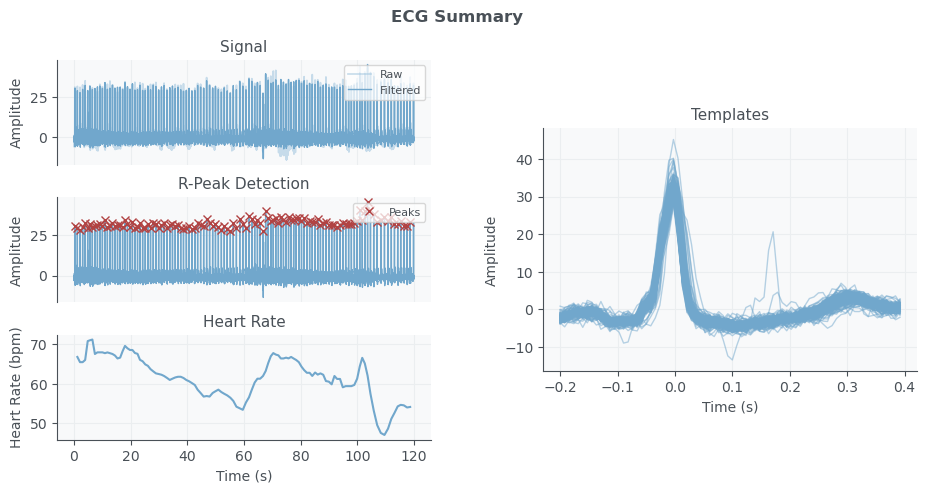

C:\Users\ritzb\anaconda3\envs\mne\Lib\site-packages\pyhrv\utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
C:\Users\ritzb\anaconda3\envs\mne\Lib\site-packages\pyhrv\time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
C:\Users\ritzb\anaconda3\envs\mne\Lib\site-packages\pyhrv\time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


ReturnTuple(nni_counter=121, nni_mean=978.176652892562, nni_min=765.625, nni_max=1296.875, hr_mean=61.87384968989552, hr_min=46.265060240963855, hr_max=78.36734693877551, hr_std=5.620221512781029, nni_diff_mean=42.057291666666664, nni_diff_min=0, nni_diff_max=140, sdnn=94.78013334519359, sdnn_index=nan, sdann=nan, rmssd=50.085376327576896, sdsd=27.312000124424586, nn50=39, pnn50=32.5, nn20=98, pnn20=81.66666666666667, nni_histogram=None, tinn_n=843.75, tinn_m=1046.875, tinn=203.125, tri_index=12.1)


In [62]:
ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = biosppy.signals.ecg.ecg(all_event_series[0], show=True, sampling_rate=128)
rpeaks = rpeaks/128 * 1000
nni = tools.nn_intervals(rpeaks)
results = td.time_domain(nni, plot=False)
#tools.hrv_export(results=results, path="D:\Documents\Code\Jupyterlab\data\\", efile='resultfile', comment=None, plots=False)
print(results)

In [63]:
rmssd_drowsy = []
sdnn_drowsy = []
mean_nn_drowsy = []
pnn50_drowsy = []
pnn20_drowsy = []
sdsd_drowsy = []

In [64]:
for signals in all_event_series:
    ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = biosppy.signals.ecg.ecg(signals, show=False, sampling_rate=128)
    rpeaks = rpeaks/128 * 1000
    nni = tools.nn_intervals(rpeaks)
    results = td.time_domain(nni, plot=False)
    rmssd_drowsy.append(results[14])
    sdnn_drowsy.append(results[11])
    mean_nn_drowsy.append(results[1])
    pnn50_drowsy.append(results[17])
    pnn20_drowsy.append(results[19])
    sdsd_drowsy.append(results[15])
print(len(rmssd_drowsy))
print(len(sdnn_drowsy))
print(len(mean_nn_drowsy))
print(len(pnn50_drowsy))
print(len(pnn20_drowsy))
print(len(sdsd_drowsy))

811
811
811
811
811
811


HRV_pNN50_Dr, HRV_pNN20_Dr, HRV_SDSD_Dr, HRV_SDNN_Dr, HRV_RMSSD_Dr, HRV_MEANNN_Dr

In [65]:
rmssd_no_drowsy = []
sdnn_no_drowsy = []
mean_nn_no_drowsy = []
pnn50_no_drowsy = []
pnn20_no_drowsy = []
sdsd_no_drowsy = []

In [66]:
non_drowsy_1 = pd.read_csv("7319612/Exp1/Exp1/Preprocessed/Physio/windows/features_window_120s_overlap_0.csv")
col_name = ['HRV_pNN50_Dr', 'HRV_pNN20_Dr', 'HRV_SDSD_Dr', 'HRV_SDNN_Dr', 'HRV_RMSSD_Dr', 'HRV_MeanNN_Dr']
non_drowsy_1 = non_drowsy_1.query('period == "Driving"')
non_drowsy_1 = non_drowsy_1.loc[:, non_drowsy_1.columns.isin(col_name)]
non_drowsy_1 = non_drowsy_1.dropna(how='any')
#print(non_drowsy_1)
rmssd_no_drowsy.extend(non_drowsy_1['HRV_RMSSD_Dr'].tolist())
sdnn_no_drowsy.extend(non_drowsy_1['HRV_SDNN_Dr'].tolist())
mean_nn_no_drowsy.extend(non_drowsy_1['HRV_MeanNN_Dr'].tolist())
pnn50_no_drowsy.extend(non_drowsy_1['HRV_pNN50_Dr'].tolist())
pnn20_no_drowsy.extend(non_drowsy_1['HRV_pNN20_Dr'].tolist())
sdsd_no_drowsy.extend(non_drowsy_1['HRV_SDSD_Dr'].tolist())
print(len(rmssd_no_drowsy))
print(len(sdnn_no_drowsy))
print(len(mean_nn_no_drowsy))
print(len(pnn50_no_drowsy))
print(len(pnn20_no_drowsy))
print(len(sdsd_no_drowsy))

248
248
248
248
248
248


In [67]:
non_drowsy_2 = pd.read_csv("7319612/Exp2/Exp2/Preprocessed/Physio/windows/features_window_180s_overlap_0.csv")
col_name = ['HRV_pNN50_Dr', 'HRV_pNN20_Dr', 'HRV_SDSD_Dr', 'HRV_SDNN_Dr', 'HRV_RMSSD_Dr', 'HRV_MeanNN_Dr']
non_drowsy_2 = non_drowsy_2.query('period == "Driving"')
non_drowsy_2 = non_drowsy_2.loc[:, non_drowsy_2.columns.isin(col_name)]
non_drowsy_2 = non_drowsy_2.dropna(how='any')
#print(non_drowsy_2)
rmssd_no_drowsy.extend(non_drowsy_2['HRV_RMSSD_Dr'].tolist())
sdnn_no_drowsy.extend(non_drowsy_2['HRV_SDNN_Dr'].tolist())
mean_nn_no_drowsy.extend(non_drowsy_2['HRV_MeanNN_Dr'].tolist())
pnn50_no_drowsy.extend(non_drowsy_2['HRV_pNN50_Dr'].tolist())
pnn20_no_drowsy.extend(non_drowsy_2['HRV_pNN20_Dr'].tolist())
sdsd_no_drowsy.extend(non_drowsy_2['HRV_SDSD_Dr'].tolist())
print(len(rmssd_no_drowsy))
print(len(sdnn_no_drowsy))
print(len(mean_nn_no_drowsy))
print(len(pnn50_no_drowsy))
print(len(pnn20_no_drowsy))
print(len(sdsd_no_drowsy))

770
770
770
770
770
770


In [68]:
non_drowsy_3 = pd.read_csv("7319612/Exp3/Exp3/Preprocessed/Physio/windows/features_window_120s_overlap_0.csv")
col_name = ['HRV_pNN50_Dr', 'HRV_pNN20_Dr', 'HRV_SDSD_Dr', 'HRV_SDNN_Dr', 'HRV_RMSSD_Dr', 'HRV_MeanNN_Dr']
non_drowsy_3 = non_drowsy_3.loc[:, non_drowsy_3.columns.isin(col_name)]
non_drowsy_3 = non_drowsy_3.dropna(how='any')
#print(non_drowsy_2)
rmssd_no_drowsy.extend(non_drowsy_3['HRV_RMSSD_Dr'].tolist())
sdnn_no_drowsy.extend(non_drowsy_3['HRV_SDNN_Dr'].tolist())
mean_nn_no_drowsy.extend(non_drowsy_3['HRV_MeanNN_Dr'].tolist())
pnn50_no_drowsy.extend(non_drowsy_3['HRV_pNN50_Dr'].tolist())
pnn20_no_drowsy.extend(non_drowsy_3['HRV_pNN20_Dr'].tolist())
sdsd_no_drowsy.extend(non_drowsy_3['HRV_SDSD_Dr'].tolist())
print(len(rmssd_no_drowsy))
print(len(sdnn_no_drowsy))
print(len(mean_nn_no_drowsy))
print(len(pnn50_no_drowsy))
print(len(pnn20_no_drowsy))
print(len(sdsd_no_drowsy))

2638
2638
2638
2638
2638
2638


In [69]:
rmssd_no_drowsy = rmssd_no_drowsy[0:811]
sdnn_no_drowsy = sdnn_no_drowsy[0:811]
mean_nn_no_drowsy = mean_nn_no_drowsy[0:811]
pnn50_no_drowsy = pnn50_no_drowsy[0:811]
pnn20_no_drowsy = pnn20_no_drowsy[0:811]
sdsd_no_drowsy = sdsd_no_drowsy[0:811]

In [70]:
print(len(rmssd_drowsy))
print(len(sdnn_drowsy))
print(len(mean_nn_drowsy))
print(len(pnn50_drowsy))
print(len(pnn20_drowsy))
print(len(sdsd_drowsy))
print(len(rmssd_no_drowsy))
print(len(sdnn_no_drowsy))
print(len(mean_nn_no_drowsy))
print(len(pnn50_no_drowsy))
print(len(pnn20_no_drowsy))
print(len(sdsd_no_drowsy))


811
811
811
811
811
811
811
811
811
811
811
811


In [71]:
extracted_model_csv = open('extracted_drowsy_data.csv', 'w')
writer = csv.writer(extracted_model_csv)
writer.writerow(('rmssd_drowsy','sdnn_drowsy','mean_nn_drowsy','pnn50_drowsy','pnn20_drowsy','sdsd_drowsy','rmssd_no_drowsy',
                 'sdnn_no_drowsy','mean_nn_no_drowsy', 'pnn50_no_drowsy', 'pnn20_no_drowsy', 'sdsd_no_drowsy'))
for i in range(0,811):
    writer.writerow((rmssd_drowsy[i], sdnn_drowsy[i], mean_nn_drowsy[i], pnn50_drowsy[i], pnn20_drowsy[i], sdsd_drowsy[i], rmssd_no_drowsy[i],
                    sdnn_no_drowsy[i], mean_nn_no_drowsy[i], pnn50_no_drowsy[i], pnn20_no_drowsy[i], sdsd_no_drowsy[i]))
extracted_model_csv.close()

In [192]:
#combined data
combined_rmssd = rmssd_no_drowsy + rmssd_drowsy
combined_sdnn = sdnn_no_drowsy + sdnn_drowsy
combined_mean_nn = mean_nn_no_drowsy + mean_nn_drowsy
combined_pnn50 = pnn50_no_drowsy + pnn50_drowsy
combined_pnn20 = pnn20_no_drowsy + pnn20_drowsy
combined_sdsd  = sdsd_no_drowsy + sdsd_drowsy
# Create Y (label) array
zeros = list(np.zeros((811,), dtype=int))
ones = list(np.ones((811,), dtype=int))
labels = zeros + ones

data = np.column_stack((combined_sdnn, combined_rmssd, combined_mean_nn, combined_pnn50, combined_pnn20, combined_sdsd, labels))
#SDSD has large negative importance
#data = np.column_stack((combined_sdnn, combined_rmssd, combined_mean_nn, combined_pnn50, combined_pnn20, labels))
print(data)

[[ 57.06248055  32.31108933 768.68387097 ...  43.22580645  32.41518351
    0.        ]
 [ 39.97201996  27.31225841 796.96644295 ...  44.29530201  27.40403034
    0.        ]
 [ 33.91508436  27.95477397 800.74324324 ...  50.          28.05018334
    0.        ]
 ...
 [ 51.50212254  35.86642844 816.05603448 ...  59.02777778  22.15489114
    1.        ]
 [ 50.30962425  31.22377255 791.09375    ...  52.34899329  18.9646204
    1.        ]
 [ 68.34178194  38.30134299 834.24388112 ...  52.81690141  27.57419293
    1.        ]]


In [193]:
final_df = pd.DataFrame(data)
final_df.to_csv('extracted_drowsy_data.csv')

In [4]:
datafr = pd.read_csv("extracted_drowsy_data.csv")
print(datafr)

      Unnamed: 0       SDNN      RMSSD      MeanNN      pNN50      pNN20  \
0              0  57.062481  32.311089  768.683871   3.225806  43.225806   
1              1  39.972020  27.312258  796.966443   4.026846  44.295302   
2              2  33.915084  27.954774  800.743243   6.081081  50.000000   
3              3  46.205139  32.670244  814.095890   8.219178  49.315068   
4              4  50.980418  43.205993  919.620155  27.131783  64.341085   
...          ...        ...        ...         ...        ...        ...   
1617        1617  53.624213  36.118205  786.216887  12.666667  57.333333   
1618        1618  62.666444  39.911618  776.960784  13.815789  54.605263   
1619        1619  51.502123  35.866428  816.056034  15.277778  59.027778   
1620        1620  50.309624  31.223773  791.093750  12.751678  52.348993   
1621        1621  68.341782  38.301343  834.243881  11.971831  52.816901   

           SDSD  Label  
0     32.415184    1.0  
1     27.404030    1.0  
2     28.050

# Data Visualization #

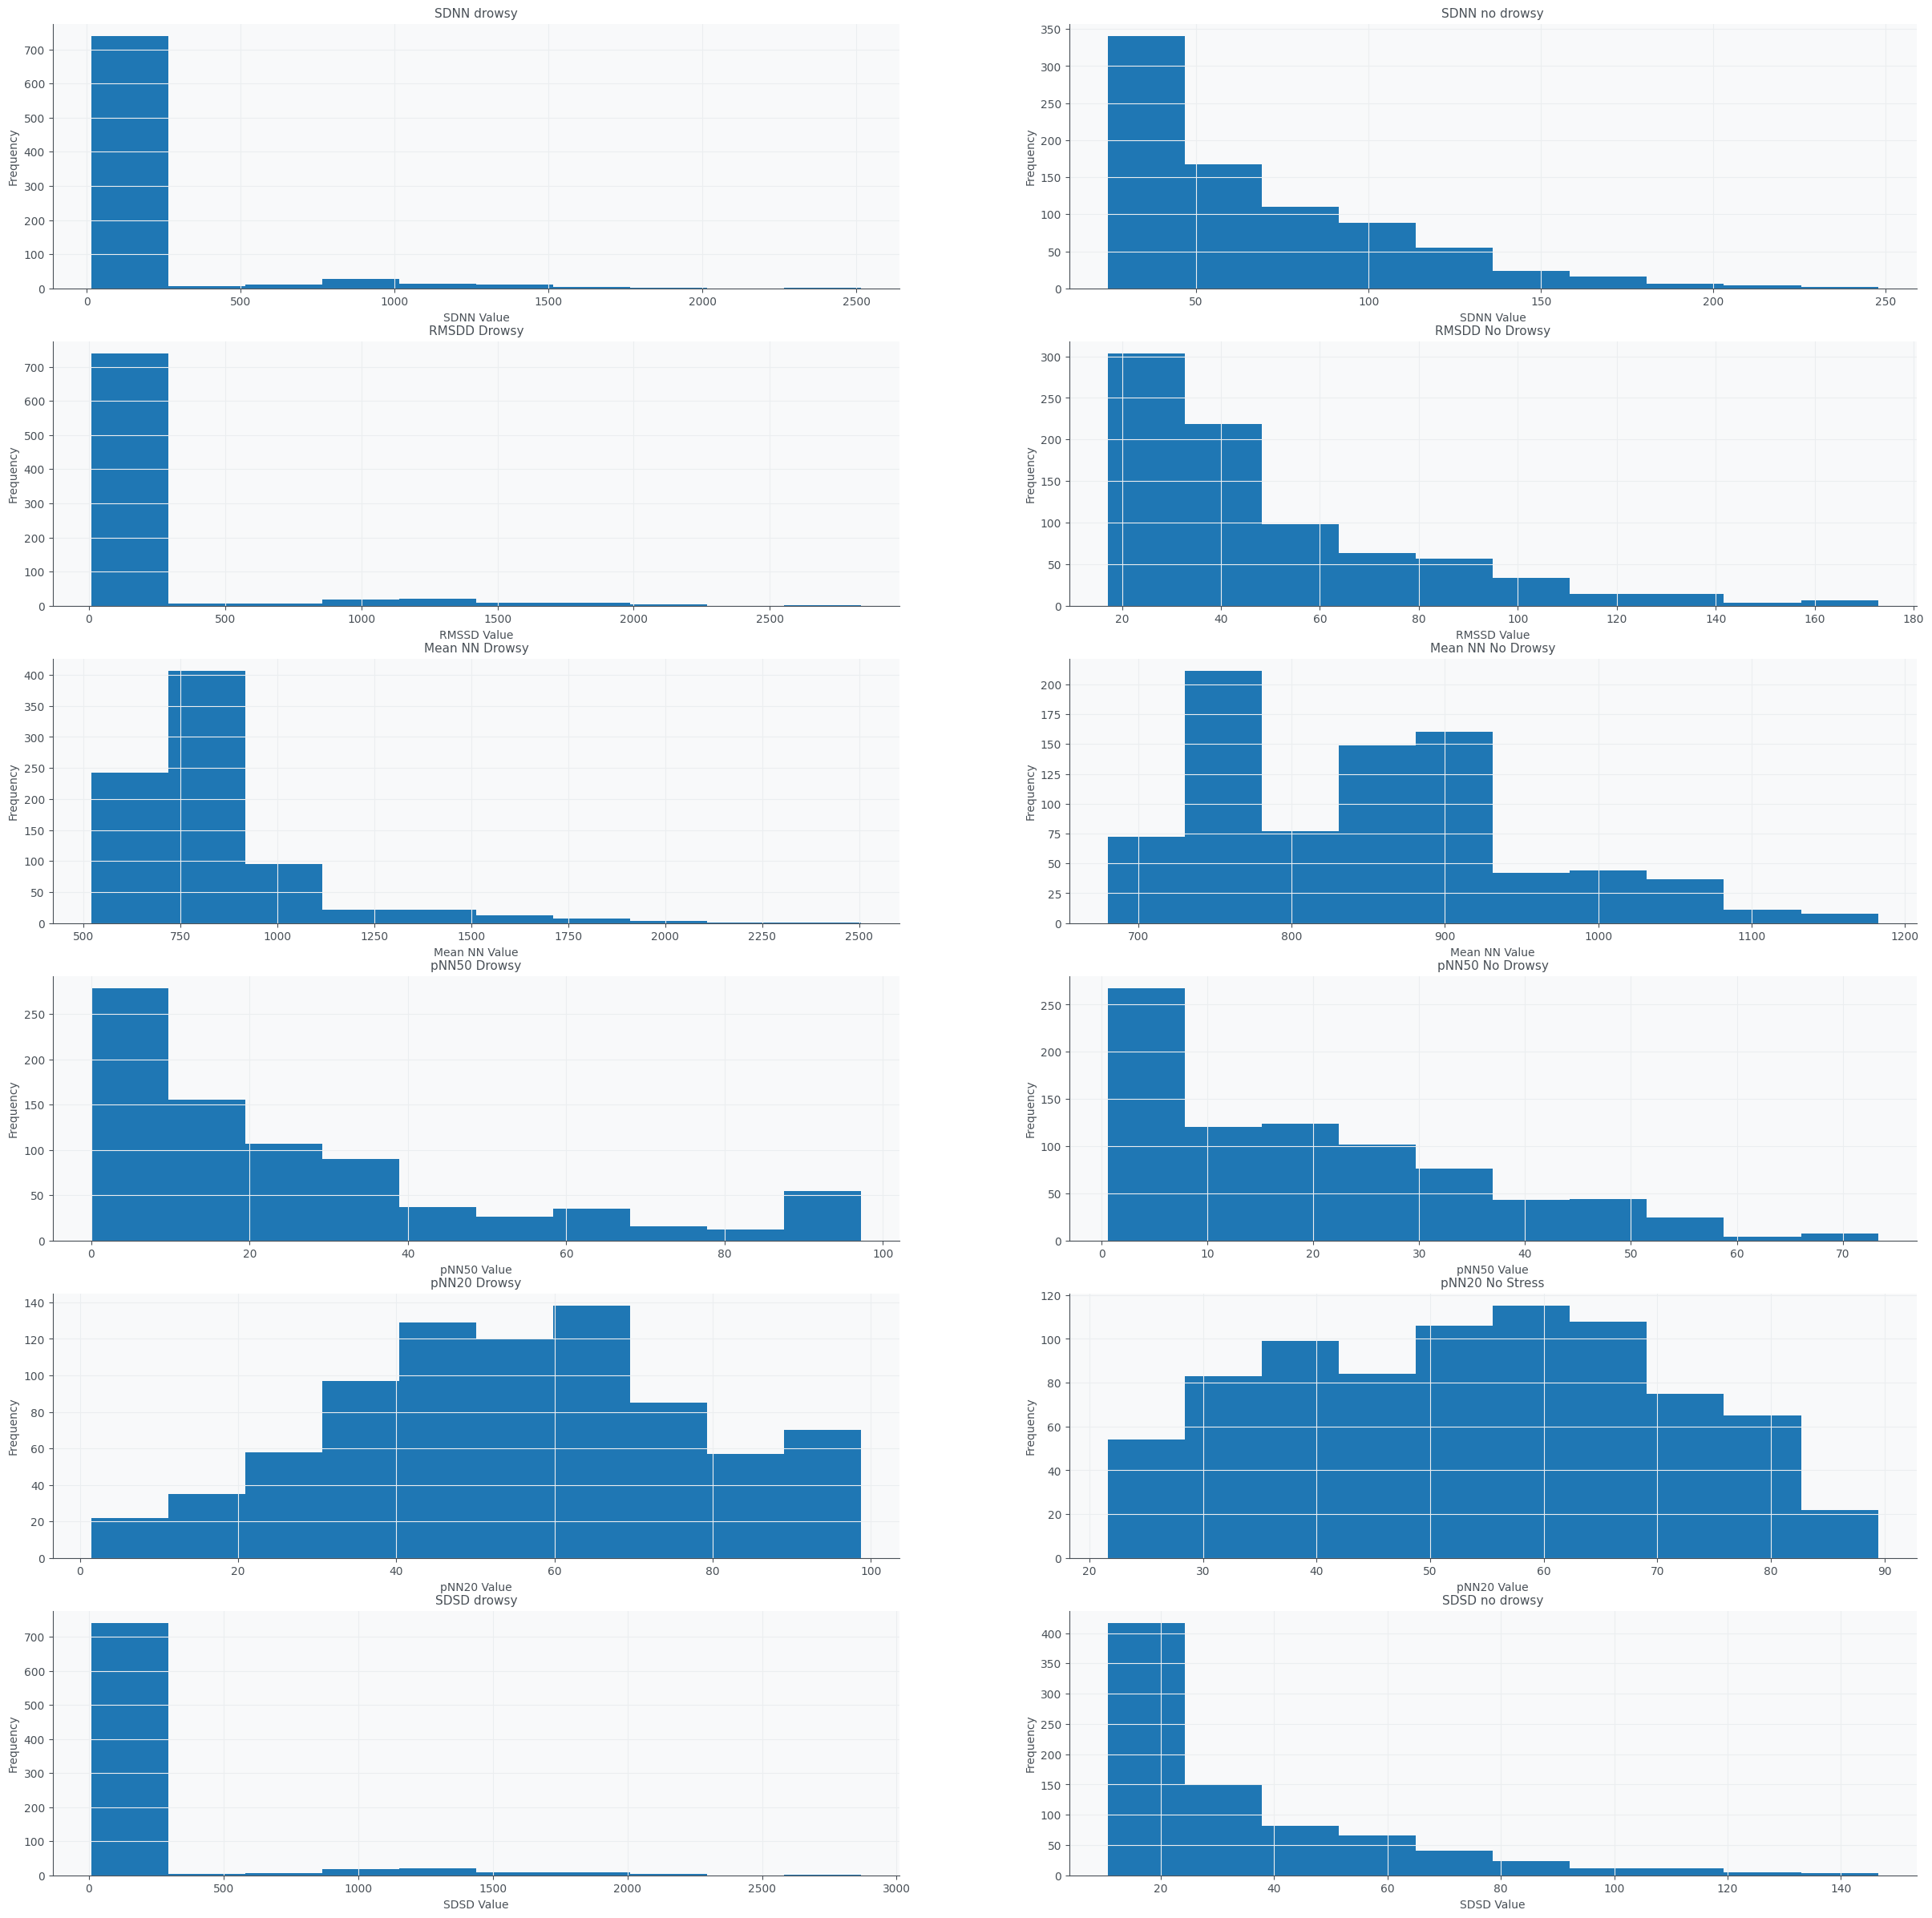

In [6]:
fig, ax = plt.subplots(6,2, figsize=(30,30))
drowsy_data = datafr.loc[datafr['Label'] == 1.0]
no_drowsy_data = datafr.loc[datafr['Label'] == 0.0]
#SDNN
ax[0,0].hist(drowsy_data['SDNN'].tolist())
ax[0,0].set_xlabel("SDNN Value")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("SDNN drowsy")

ax[0,1].hist(no_drowsy_data['SDNN'].tolist())
ax[0,1].set_xlabel("SDNN Value")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("SDNN no drowsy")

#RMSSD
ax[1,0].hist(drowsy_data['RMSSD'].tolist())
ax[1,0].set_xlabel("RMSSD Value")
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_title("RMSDD Drowsy")

ax[1,1].hist(no_drowsy_data['RMSSD'].tolist())
ax[1,1].set_xlabel("RMSSD Value")
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_title("RMSDD No Drowsy")

#mean nn
ax[2,0].hist(drowsy_data['MeanNN'].tolist())
ax[2,0].set_xlabel("Mean NN Value")
ax[2,0].set_ylabel("Frequency")
ax[2,0].set_title("Mean NN Drowsy")

ax[2,1].hist(no_drowsy_data['MeanNN'].tolist())
ax[2,1].set_xlabel("Mean NN Value")
ax[2,1].set_ylabel("Frequency")
ax[2,1].set_title("Mean NN No Drowsy")

#PNN50
ax[3,0].hist(drowsy_data['pNN50'].tolist())
ax[3,0].set_xlabel("pNN50 Value")
ax[3,0].set_ylabel("Frequency")
ax[3,0].set_title("pNN50 Drowsy")

ax[3,1].hist(no_drowsy_data['pNN50'].tolist())
ax[3,1].set_xlabel("pNN50 Value")
ax[3,1].set_ylabel("Frequency")
ax[3,1].set_title("pNN50 No Drowsy")

#PNN20
ax[4,0].hist(drowsy_data['pNN20'].tolist())
ax[4,0].set_xlabel("pNN20 Value")
ax[4,0].set_ylabel("Frequency")
ax[4,0].set_title("pNN20 Drowsy")

ax[4,1].hist(no_drowsy_data['pNN20'].tolist())
ax[4,1].set_xlabel("pNN20 Value")
ax[4,1].set_ylabel("Frequency")
ax[4,1].set_title("pNN20 No Stress")

#SDSD
ax[5,0].hist(drowsy_data['SDSD'].tolist())
ax[5,0].set_xlabel("SDSD Value")
ax[5,0].set_ylabel("Frequency")
ax[5,0].set_title("SDSD drowsy")

ax[5,1].hist(no_drowsy_data['SDSD'].tolist())
ax[5,1].set_xlabel("SDSD Value")
ax[5,1].set_ylabel("Frequency")
ax[5,1].set_title("SDSD no drowsy")
print()

In [27]:
def reject_outliers(data, m = 3):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

label_drowsy = drowsy_data['Label']
label_no_drowsy= no_drowsy_data['Label']
sdnn_drowsy = reject_outliers(drowsy_data['SDNN'])
sdnn_no_drowsy = reject_outliers(no_drowsy_data['SDNN'])

rmssd_drowsy = reject_outliers(drowsy_data['RMSSD'])
rmssd_no_drowsy = reject_outliers(no_drowsy_data['RMSSD'])

meanNN_drowsy = reject_outliers(drowsy_data['MeanNN'])
meanNN_no_drowsy = reject_outliers(no_drowsy_data['MeanNN'])

pNN50_drowsy = reject_outliers(drowsy_data['pNN50'])
pNN50_no_drowsy = reject_outliers(no_drowsy_data['pNN50'])

pNN20_drowsy = reject_outliers(drowsy_data['pNN20'])
pNN20_no_drowsy = reject_outliers(no_drowsy_data['pNN20'])

sdsd_drowsy = reject_outliers(drowsy_data['SDSD'])
sdsd_no_drowsy = reject_outliers(no_drowsy_data['SDSD'])

print('SDNN Drowsy filtered:', len(sdnn_drowsy))
print('RMSSD Drowsy filtered:', len(rmssd_drowsy))
print('Mean NN Drowsy filtered:', len(meanNN_drowsy))
print('pNN50 Drowsy filtered:', len(pNN50_drowsy))
print('pNN20 Drowsy filtered:', len(pNN20_drowsy))
print('SDSD Drowsy filtered:', len(sdsd_drowsy))

print('SDNN No Drowsy filtered:', len(sdnn_no_drowsy))
print('RMSSD No Drowsy filtered:', len(rmssd_no_drowsy))
print('Mean NN No Drowsy filtered:', len(meanNN_no_drowsy))
print('pNN50 No Drowsy filtered:', len(pNN50_no_drowsy))
print('pNN20 No Drowsy filtered:', len(pNN20_no_drowsy))
print('SDSD No Drowsy filtered:', len(sdsd_no_drowsy))

SDNN Drowsy filtered: 700
RMSSD Drowsy filtered: 669
Mean NN Drowsy filtered: 721
pNN50 Drowsy filtered: 692
pNN20 Drowsy filtered: 792
SDSD Drowsy filtered: 669
SDNN No Drowsy filtered: 674
RMSSD No Drowsy filtered: 704
Mean NN No Drowsy filtered: 798
pNN50 No Drowsy filtered: 762
pNN20 No Drowsy filtered: 811
SDSD No Drowsy filtered: 647


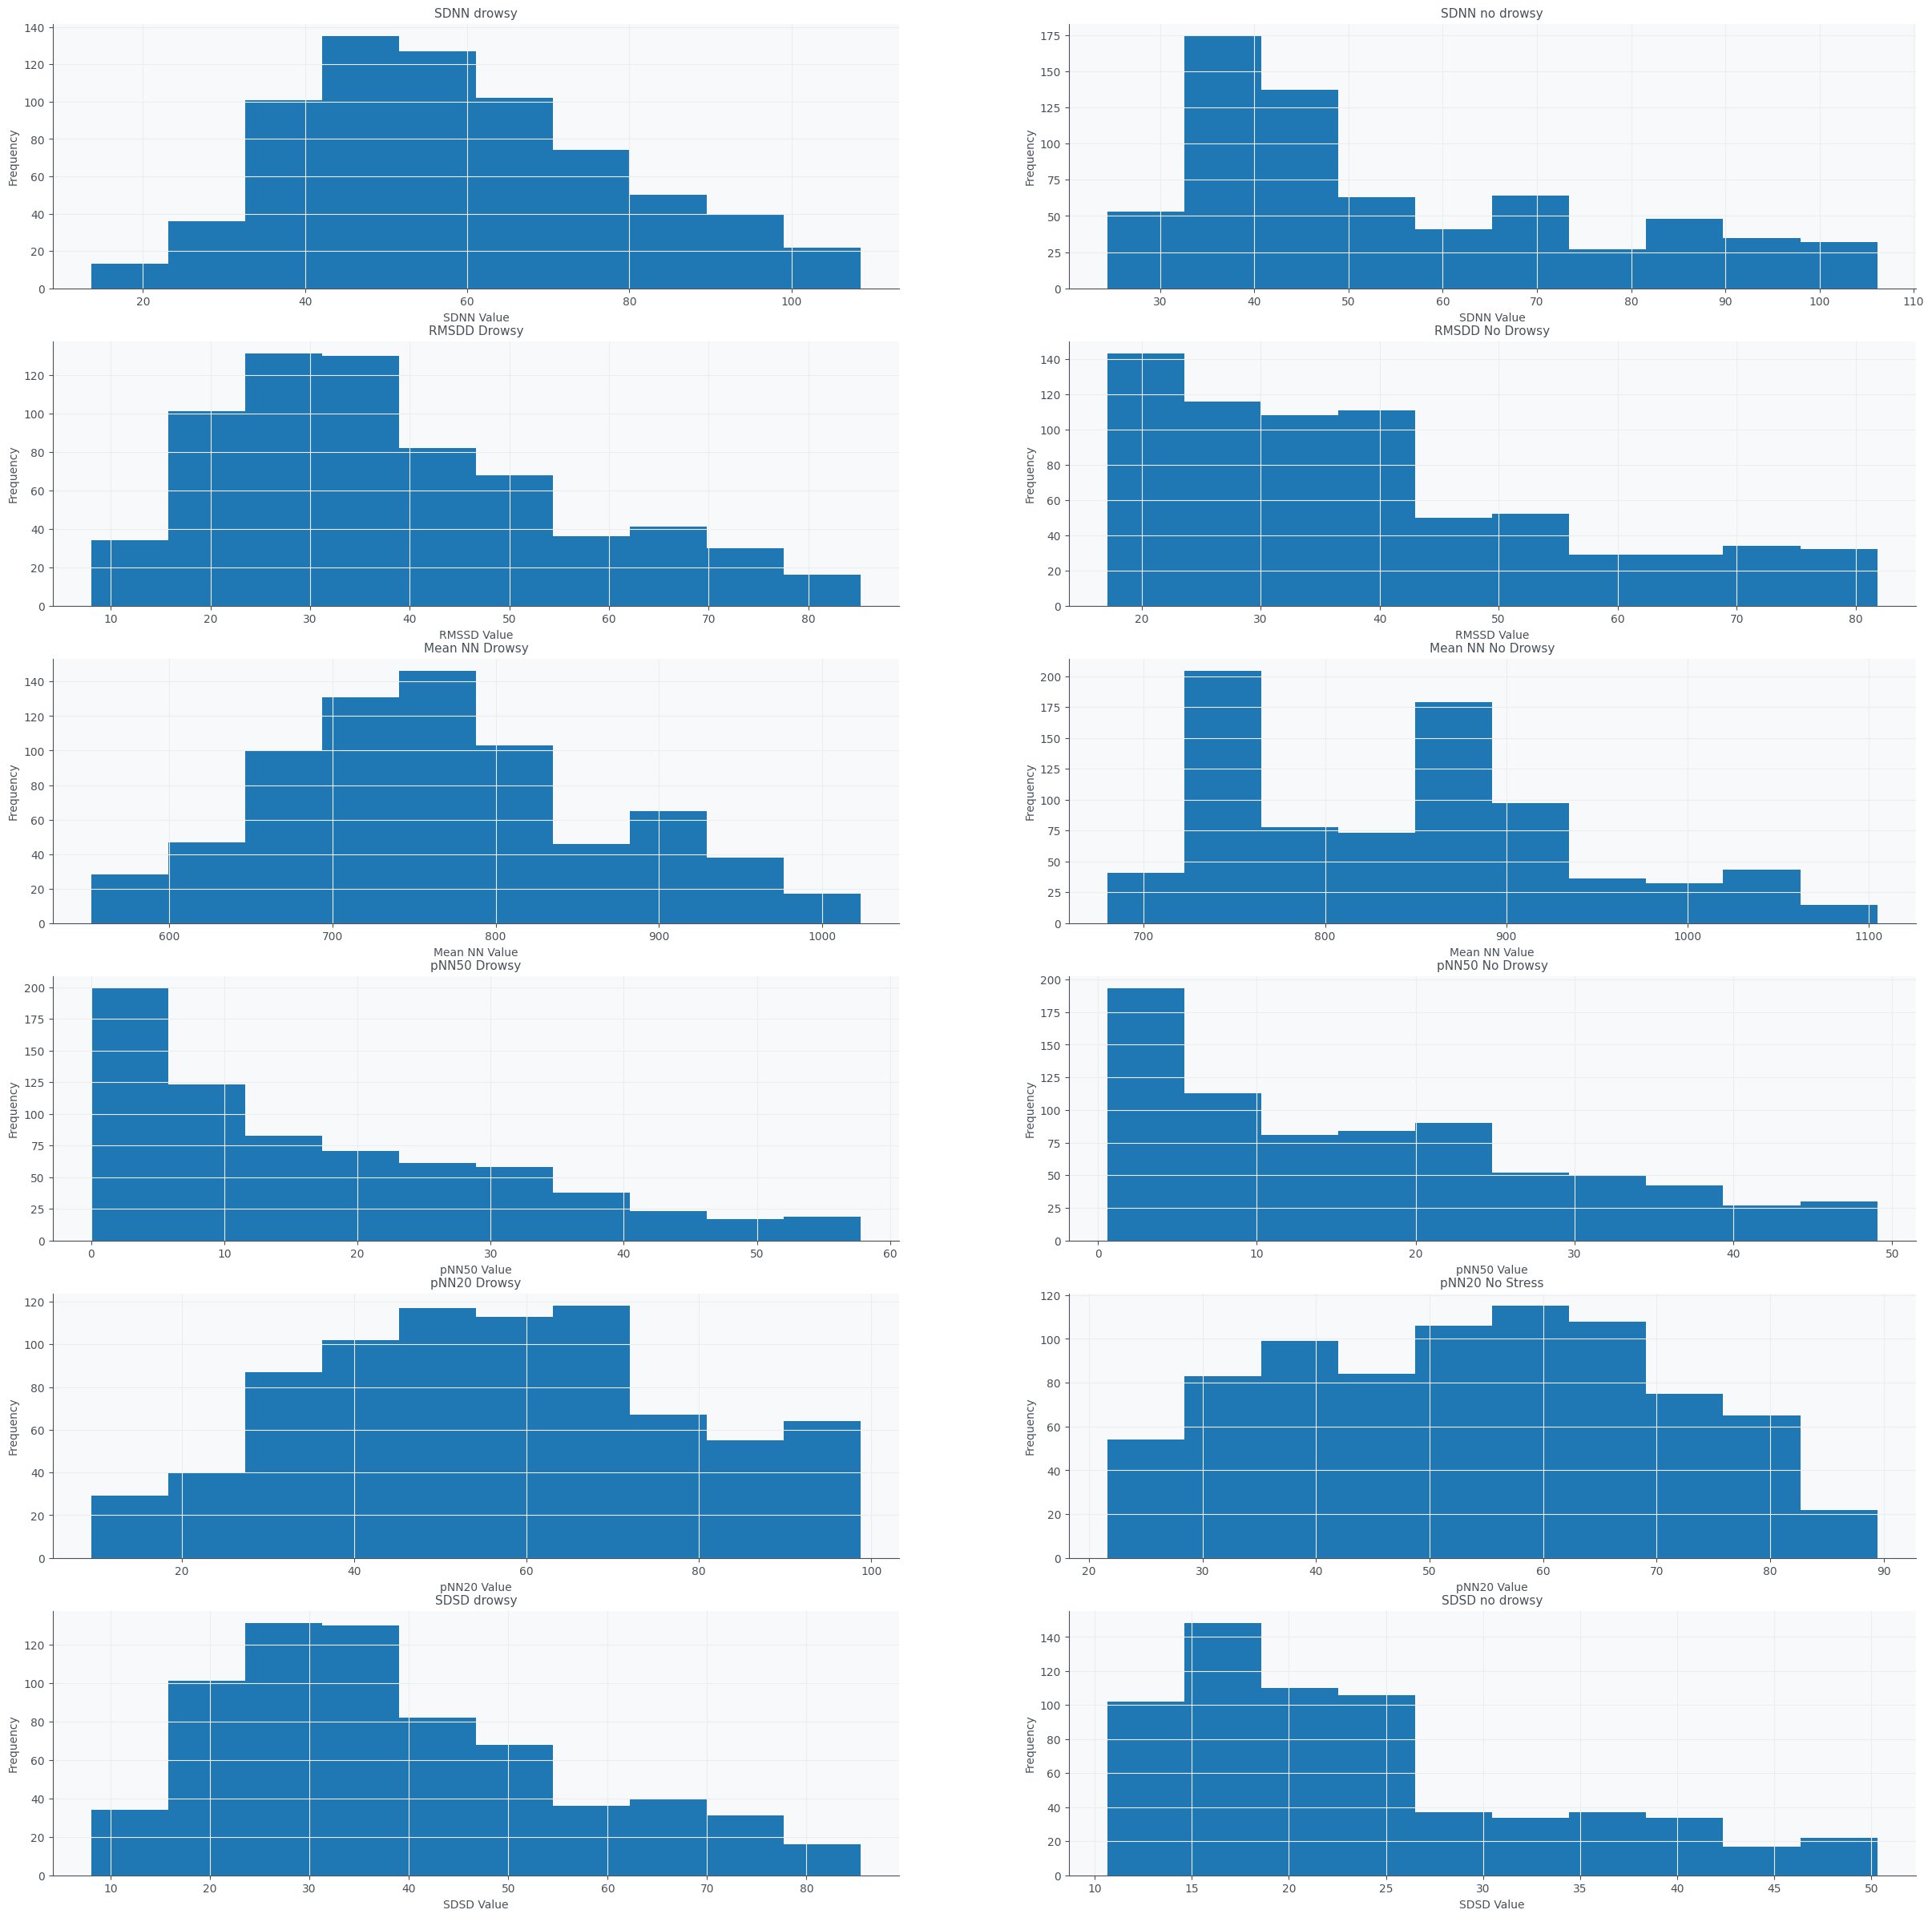

In [28]:
fig, ax = plt.subplots(6,2, figsize=(30,30))

#SDNN
ax[0,0].hist(sdnn_drowsy)
ax[0,0].set_xlabel("SDNN Value")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("SDNN drowsy")

ax[0,1].hist(sdnn_no_drowsy)
ax[0,1].set_xlabel("SDNN Value")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("SDNN no drowsy")

#RMSSD
ax[1,0].hist(rmssd_drowsy)
ax[1,0].set_xlabel("RMSSD Value")
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_title("RMSDD Drowsy")

ax[1,1].hist(rmssd_no_drowsy)
ax[1,1].set_xlabel("RMSSD Value")
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_title("RMSDD No Drowsy")

#mean nn
ax[2,0].hist(meanNN_drowsy)
ax[2,0].set_xlabel("Mean NN Value")
ax[2,0].set_ylabel("Frequency")
ax[2,0].set_title("Mean NN Drowsy")

ax[2,1].hist(meanNN_no_drowsy)
ax[2,1].set_xlabel("Mean NN Value")
ax[2,1].set_ylabel("Frequency")
ax[2,1].set_title("Mean NN No Drowsy")

#PNN50
ax[3,0].hist(pNN50_drowsy)
ax[3,0].set_xlabel("pNN50 Value")
ax[3,0].set_ylabel("Frequency")
ax[3,0].set_title("pNN50 Drowsy")

ax[3,1].hist(pNN50_no_drowsy)
ax[3,1].set_xlabel("pNN50 Value")
ax[3,1].set_ylabel("Frequency")
ax[3,1].set_title("pNN50 No Drowsy")

#PNN20
ax[4,0].hist(pNN20_drowsy)
ax[4,0].set_xlabel("pNN20 Value")
ax[4,0].set_ylabel("Frequency")
ax[4,0].set_title("pNN20 Drowsy")

ax[4,1].hist(pNN20_no_drowsy)
ax[4,1].set_xlabel("pNN20 Value")
ax[4,1].set_ylabel("Frequency")
ax[4,1].set_title("pNN20 No Stress")

#SDSD
ax[5,0].hist(sdsd_drowsy)
ax[5,0].set_xlabel("SDSD Value")
ax[5,0].set_ylabel("Frequency")
ax[5,0].set_title("SDSD drowsy")

ax[5,1].hist(sdsd_no_drowsy)
ax[5,1].set_xlabel("SDSD Value")
ax[5,1].set_ylabel("Frequency")
ax[5,1].set_title("SDSD no drowsy")
print()

In [139]:
#Reconstruct data frame
drowsy = pd.concat([sdnn_drowsy, rmssd_drowsy, meanNN_drowsy, pNN50_drowsy, pNN20_drowsy, sdsd_drowsy, label_drowsy], axis=1)
not_drowsy = pd.concat([sdnn_no_drowsy, rmssd_no_drowsy, meanNN_no_drowsy, pNN50_no_drowsy, pNN20_no_drowsy, sdsd_no_drowsy, label_no_drowsy], axis = 1)
drowsy.dropna(inplace=True)
not_drowsy.dropna(inplace=True)
print(drowsy)
print(not_drowsy)

data = pd.concat([drowsy, not_drowsy], ignore_index=True)
data.to_csv("extracted_drowsy_data_filtered.csv")
data = data.to_numpy()
print(data)

          SDNN      RMSSD      MeanNN      pNN50      pNN20       SDSD  Label
0    57.062481  32.311089  768.683871   3.225806  43.225806  32.415184    1.0
1    39.972020  27.312258  796.966443   4.026846  44.295302  27.404030    1.0
2    33.915084  27.954774  800.743243   6.081081  50.000000  28.050183    1.0
3    46.205139  32.670244  814.095890   8.219178  49.315068  32.782375    1.0
4    50.980418  43.205993  919.620155  27.131783  64.341085  43.342358    1.0
..         ...        ...         ...        ...        ...        ...    ...
806  41.198309  27.770664  825.166667   9.027778  44.444444  27.856589    1.0
807  32.274262  26.257084  815.835616   1.369863  47.945205  26.344374    1.0
808  39.736896  23.871111  802.817568   2.702703  39.189189  23.951390    1.0
809  34.182838  24.886858  790.100000   2.666667  40.666667  24.970082    1.0
810  61.686088  30.631844  828.902098  10.489510  56.643357  30.740068    1.0

[621 rows x 7 columns]
           SDNN      RMSSD       MeanNN 

# Training Models on HRV features #

## NN ##

In [109]:
X, y = data[:,:6], data[:,-1]
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)
print(len(X_tr))
print(len(X_val))

918
306


In [76]:
# Create and train classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes = (150,200,30), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.1, batch_size=50, max_iter=1000)
mlp_classifier.fit(X_tr, y_tr)

# Compute the training and test error rates
y_tr_pred = mlp_classifier.predict(X_tr)
tr_accuracy = accuracy_score(y_tr, y_tr_pred)
tr_error = 1 - (tr_accuracy)

y_val_pred = mlp_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - (val_accuracy)

print("Training Error: ", tr_error)
print("Validation Error: ", val_error)

print("Training Accuracy: ", tr_accuracy)
print("Validation Accuracy: ", val_accuracy)

# Confidence Score
conf = mlp_classifier.predict_proba(X_val)
#print(conf)
#print(mlp_classifier.classes_)

Training Error:  0.4912854030501089
Validation Error:  0.49673202614379086
Training Accuracy:  0.5087145969498911
Validation Accuracy:  0.5032679738562091


### Feature importance ###

Feature: SDNN, Score: 0.00000
Feature: RMSSD, Score: 0.00000
Feature: Mean NN, Score: 0.00000
Feature: pNN50, Score: 0.00000
Feature: pNN20, Score: 0.00000
Feature: SDSD, Score: 0.00000


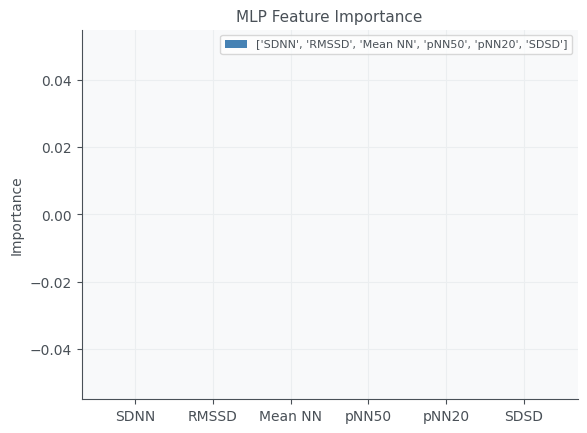

In [82]:
# Perform permutation importance
results = permutation_importance(mlp_classifier, X_tr, y_tr, scoring='accuracy')

# Get Importance
importance = results.importances_mean

bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('MLP Feature Importance')
plt.legend()
plt.show()

### Confusion Matrix ###

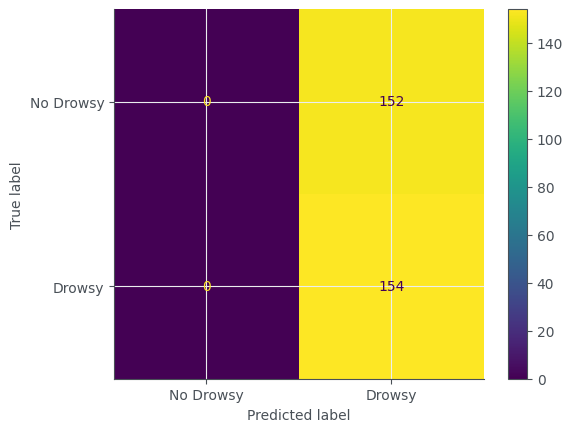

In [78]:
ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_val, y_val, display_labels=['No Drowsy', 'Drowsy'])

## Logistic Regression ##

In [88]:
# Initialize the model
lr = LogisticRegression(C=000.1)

# Fit the model to the training set
lr.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = lr.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = lr.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.0
Testing Error:  0.0


C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Inverse Regularization ###

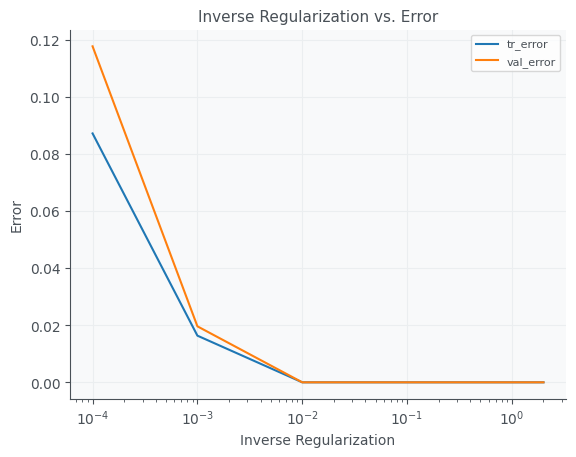

In [80]:
C_vals = [.0001,.001,.01,.1,1.,2.]
training_error = []
val_error = []

for c in C_vals:
    # Train a logistic regression model with each inverse regularization C
    lr_reg = LogisticRegression(C=c, solver='liblinear')
    lr_reg.fit(X_tr, y_tr)
    
    # Compute the training and test error rates
    y_tr_pred = lr_reg.predict(X_tr)
    y_tr_error = 1 - (accuracy_score(y_tr, y_tr_pred))
    training_error.append(y_tr_error)

    y_val_pred = lr_reg.predict(X_val)
    y_val_error = 1 - (accuracy_score(y_val, y_val_pred))
    val_error.append(y_val_error)
    
# Plot the resulting performance as a function of C
plt.semilogx(C_vals, training_error, label='tr_error')
plt.semilogx(C_vals, val_error, label='val_error')

plt.title("Inverse Regularization vs. Error")
plt.xlabel('Inverse Regularization')
plt.ylabel('Error')
plt.legend()

In [86]:
# Cross Validation
scores = cross_val_score(lr, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[[ 0.01151448 -1.18698786 -0.007527    0.14962538  0.06692192  1.1249871 ]]
Feature: SDNN, Score: 0.01151
Feature: RMSSD, Score: -1.18699
Feature: Mean NN, Score: -0.00753
Feature: pNN50, Score: 0.14963
Feature: pNN20, Score: 0.06692
Feature: SDSD, Score: 1.12499


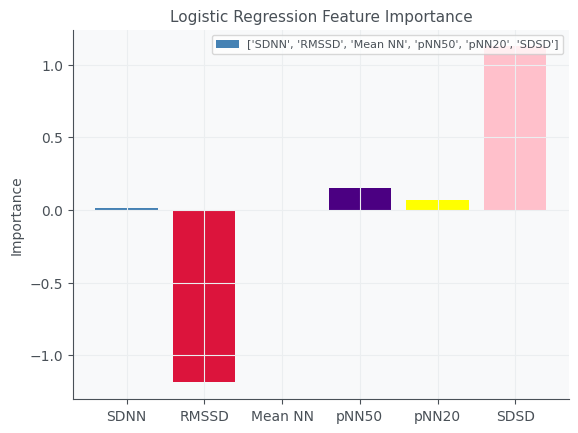

In [89]:
# Get Importance
importance = lr.coef_[0]
print(lr.coef_)
bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.legend()
plt.show()

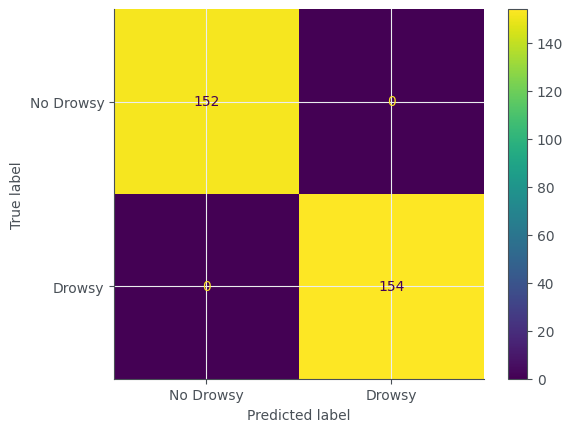

In [90]:
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val, display_labels=['No Drowsy', 'Drowsy'])

# Naive Bayes #

In [91]:
# Initialize the model
nb = GaussianNB()

# Fit the model to the training set
nb.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = nb.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = lr.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.28867102396514166
Testing Error:  0.0


Feature: SDNN, Score: -0.01111
Feature: RMSSD, Score: -0.02092
Feature: Mean NN, Score: 0.06209
Feature: pNN50, Score: -0.01743
Feature: pNN20, Score: -0.00327
Feature: SDSD, Score: 0.14248


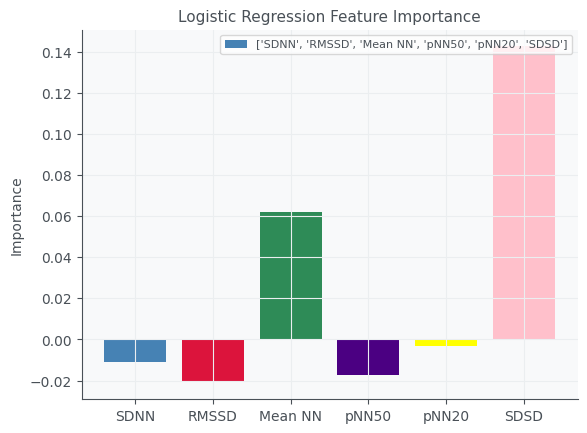

In [92]:
# Get Importance
# Perform permutation importance
results = permutation_importance(nb, X_tr, y_tr, scoring='accuracy')

# Get Importance
importance = results.importances_mean
bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.legend()
plt.show()

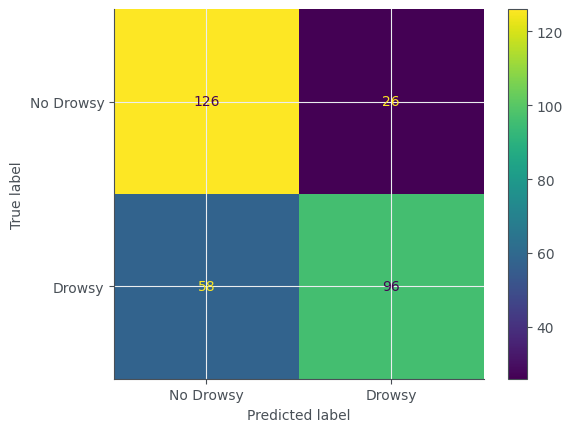

In [93]:
ConfusionMatrixDisplay.from_estimator(nb, X_val, y_val, display_labels=['No Drowsy', 'Drowsy'])

# K nearest Neighbors #

In [96]:
# Initialize the model
knc = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training set
knc.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = knc.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = lr.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.05664488017429192
Testing Error:  0.0


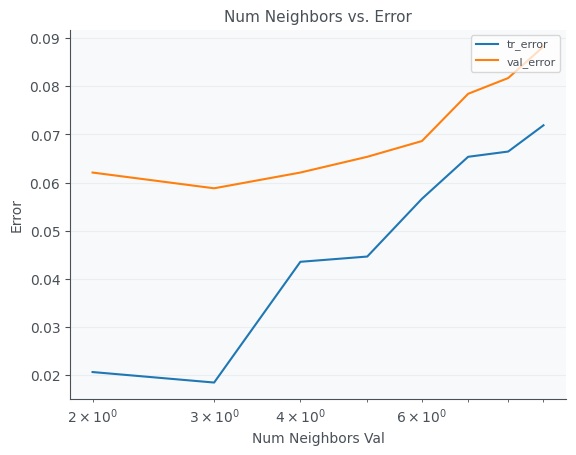

[0.020697167755991286, 0.01851851851851849, 0.04357298474945537, 0.04466230936819171, 0.05664488017429192, 0.065359477124183, 0.06644880174291934, 0.07189542483660127]
[0.06209150326797386, 0.05882352941176472, 0.06209150326797386, 0.065359477124183, 0.06862745098039214, 0.07843137254901966, 0.0816993464052288, 0.08823529411764708]


In [95]:
num_neighbors = [2, 3, 4, 5, 6, 7, 8, 9]
training_error = []
val_error = []

for n in num_neighbors:
    # Train a logistic regression model with each inverse regularization C
    knc_neighbors = KNeighborsClassifier(n_neighbors=n)
    knc_neighbors.fit(X_tr, y_tr)
    
    # Compute the training and test error rates
    y_tr_pred = knc_neighbors.predict(X_tr)
    y_tr_error = 1 - (accuracy_score(y_tr, y_tr_pred))
    training_error.append(y_tr_error)

    y_val_pred = knc_neighbors.predict(X_val)
    y_val_error = 1 - (accuracy_score(y_val, y_val_pred))
    val_error.append(y_val_error)
    
# Plot the resulting performance as a function of C
plt.semilogx(num_neighbors, training_error, label='tr_error')
plt.semilogx(num_neighbors, val_error, label='val_error')

plt.title("Num Neighbors vs. Error")
plt.xlabel('Num Neighbors Val')
plt.ylabel('Error')
plt.legend()

plt.show()
print(training_error)
print(val_error)

Feature: SDNN, Score: 0.06928
Feature: RMSSD, Score: 0.03007
Feature: Mean NN, Score: 0.26841
Feature: pNN50, Score: 0.01786
Feature: pNN20, Score: 0.04336
Feature: SDSD, Score: 0.24641


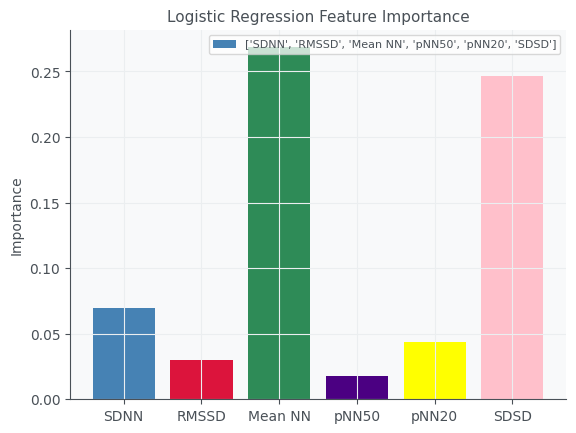

In [97]:
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(X_tr, y_tr)

# Perform permutation importance
results = permutation_importance(knc, X_tr, y_tr, scoring='accuracy')

# Get Importance
importance = results.importances_mean
bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.legend()
plt.show()

[0. 1.]


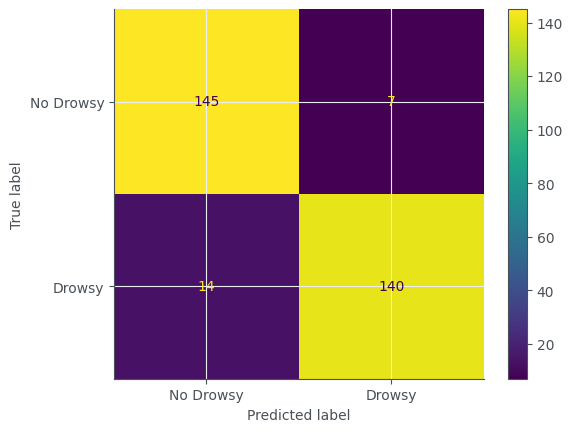

In [98]:
# Confidence Score
conf = knc.predict_proba(X_val)
#print(conf)
print(knc.classes_)
ConfusionMatrixDisplay.from_estimator(knc, X_val, y_val, display_labels=['No Drowsy', 'Drowsy'])

# Decision Tree #

In [110]:
# Initialize the model
dt = DecisionTreeClassifier()

# Fit the model to the training set
dt.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = dt.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = dt.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.0
Testing Error:  0.03594771241830064


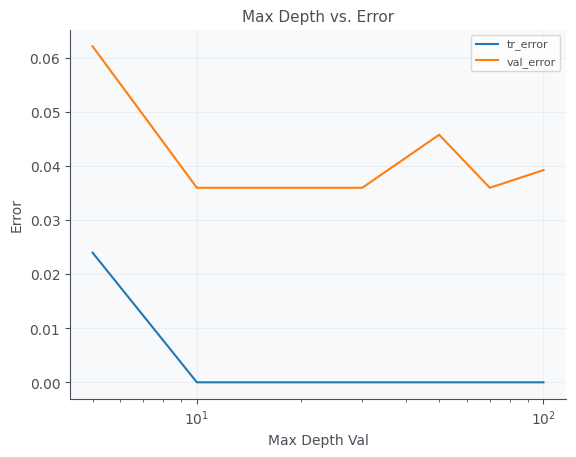

[0.023965141612200425, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.06209150326797386, 0.03594771241830064, 0.03594771241830064, 0.04575163398692805, 0.03594771241830064, 0.039215686274509776]


In [111]:


max_depth = [5, 10, 30, 50, 70, 100]
training_error = []
val_error = []

for d in max_depth:
    # Train a logistic regression model with each inverse regularization C
    dt_depth = DecisionTreeClassifier(max_depth=d)
    dt_depth.fit(X_tr, y_tr)
    
    # Compute the training and test error rates
    y_tr_pred = dt_depth.predict(X_tr)
    y_tr_error = 1 - (accuracy_score(y_tr, y_tr_pred))
    training_error.append(y_tr_error)

    y_val_pred = dt_depth.predict(X_val)
    y_val_error = 1 - (accuracy_score(y_val, y_val_pred))
    val_error.append(y_val_error)
    
# Plot the resulting performance as a function of C
plt.semilogx(max_depth, training_error, label='tr_error')
plt.semilogx(max_depth, val_error, label='val_error')

plt.title("Max Depth vs. Error")
plt.xlabel('Max Depth Val')
plt.ylabel('Error')
plt.legend()

plt.show()
print(training_error)
print(val_error)



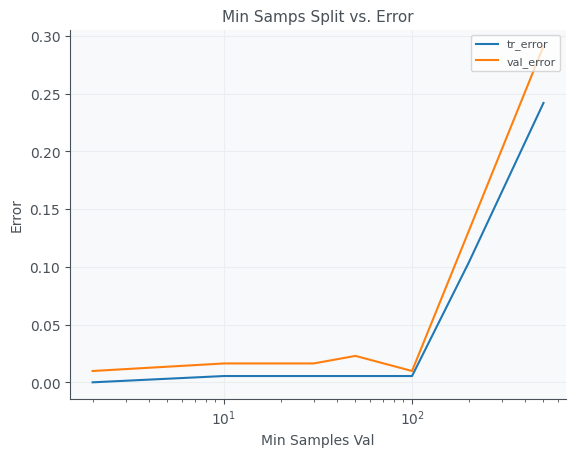

[0.0, 0.005446623093681935, 0.005446623093681935, 0.005446623093681935, 0.005446623093681935, 0.10348583877995643, 0.24183006535947715]
[0.009803921568627416, 0.016339869281045805, 0.016339869281045805, 0.022875816993464082, 0.009803921568627416, 0.130718954248366, 0.29084967320261434]


In [124]:
min_samps = [2, 10, 30, 50, 100, 200, 500]
training_error = []
val_error = []

for s in min_samps:
    # Train a logistic regression model with each inverse regularization C
    dt_min_samp = DecisionTreeClassifier(criterion='entropy',min_samples_split=s)
    dt_min_samp.fit(X_tr, y_tr)
    
    # Compute the training and test error rates
    y_tr_pred = dt_min_samp.predict(X_tr)
    y_tr_error = 1 - (accuracy_score(y_tr, y_tr_pred))
    training_error.append(y_tr_error)

    y_val_pred = dt_min_samp.predict(X_val)
    y_val_error = 1 - (accuracy_score(y_val, y_val_pred))
    val_error.append(y_val_error)
    
# Plot the resulting performance as a function of C
plt.semilogx(min_samps, training_error, label='tr_error')
plt.semilogx(min_samps, val_error, label='val_error')

plt.title("Min Samps Split vs. Error")
plt.xlabel('Min Samples Val')
plt.ylabel('Error')
plt.legend()

plt.show()
print(training_error)
print(val_error)

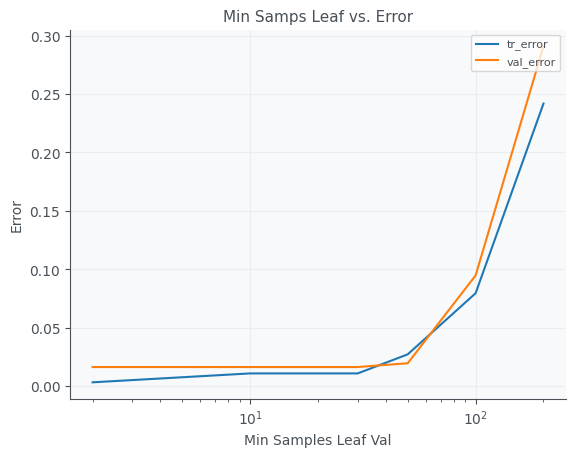

[0.0032679738562091387, 0.01089324618736387, 0.01089324618736387, 0.027233115468409563, 0.079520697167756, 0.24183006535947715]
[0.016339869281045805, 0.016339869281045805, 0.016339869281045805, 0.019607843137254943, 0.09477124183006536, 0.29084967320261434]


In [125]:
min_samps_leaf = [2, 10, 30, 50, 100, 200]
training_error = []
val_error = []

for s in min_samps_leaf:
    # Train a logistic regression model with each inverse regularization C
    dt_min_samp_leaf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=s)
    dt_min_samp_leaf.fit(X_tr, y_tr)
    
    # Compute the training and test error rates
    y_tr_pred = dt_min_samp_leaf.predict(X_tr)
    y_tr_error = 1 - (accuracy_score(y_tr, y_tr_pred))
    training_error.append(y_tr_error)

    y_val_pred = dt_min_samp_leaf.predict(X_val)
    y_val_error = 1 - (accuracy_score(y_val, y_val_pred))
    val_error.append(y_val_error)
    
# Plot the resulting performance as a function of C
plt.semilogx(min_samps_leaf, training_error, label='tr_error')
plt.semilogx(min_samps_leaf, val_error, label='val_error')

plt.title("Min Samps Leaf vs. Error")
plt.xlabel('Min Samples Leaf Val')
plt.ylabel('Error')
plt.legend()

plt.show()
print(training_error)
print(val_error)

In [131]:
# Initialize the model
dt = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=40, min_samples_split=50, min_samples_leaf=50, min_weight_fraction_leaf=0.0,
                           max_features=None, random_state=1234, max_leaf_nodes = 1000)

# Fit the model to the training set
dt.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = dt.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = dt.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.027233115468409563
Testing Error:  0.019607843137254943


Feature: SDNN, Score: 0.00000
Feature: RMSSD, Score: 0.25434
Feature: Mean NN, Score: 0.13809
Feature: pNN50, Score: 0.00220
Feature: pNN20, Score: 0.00000
Feature: SDSD, Score: 0.60536
Feature: SDNN, Score: 0.00000
Feature: RMSSD, Score: 0.25434
Feature: Mean NN, Score: 0.13809
Feature: pNN50, Score: 0.00220
Feature: pNN20, Score: 0.00000
Feature: SDSD, Score: 0.60536


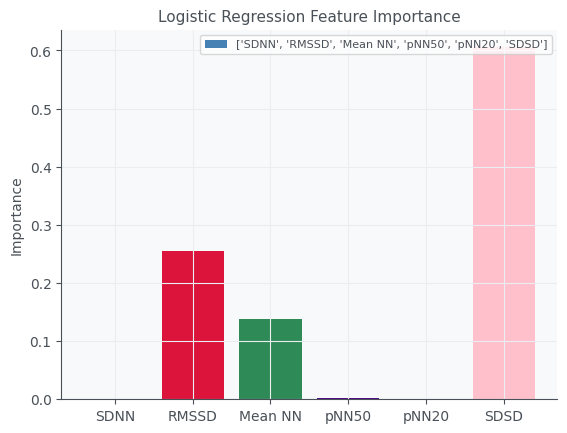

In [132]:
# Get Importance
importance = dt.feature_importances_
bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))

# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.legend()
plt.show()    

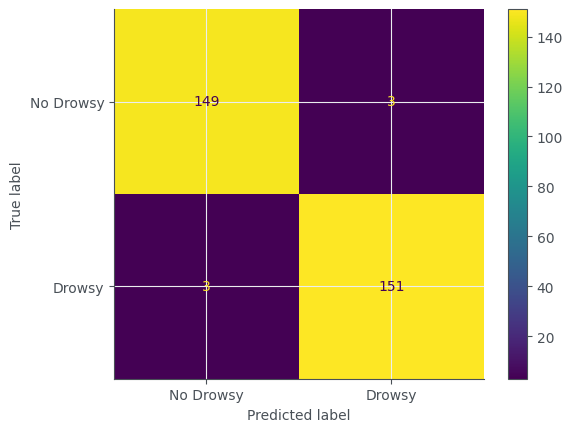

In [133]:
ConfusionMatrixDisplay.from_estimator(dt, X_val, y_val, display_labels=['No Drowsy', 'Drowsy'])

In [138]:
# Initialize the model
mlp = MLPClassifier(max_iter=1000, )

# Fit the model to the training set
mlp.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = mlp.predict(X_tr)
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))
train_error = 1 - (accuracy_score(y_tr, y_tr_pred))

y_val_pred = mlp.predict(X_val)
val_error = 1 - (accuracy_score(y_val, y_val_pred))

print("Training Error: ", train_error)
print("Testing Error: ", val_error)

Training Error:  0.0
Testing Error:  0.0


Feature: SDNN, Score: 0.00044
Feature: RMSSD, Score: 0.31133
Feature: Mean NN, Score: 0.00022
Feature: pNN50, Score: 0.00697
Feature: pNN20, Score: 0.00065
Feature: SDSD, Score: 0.53072


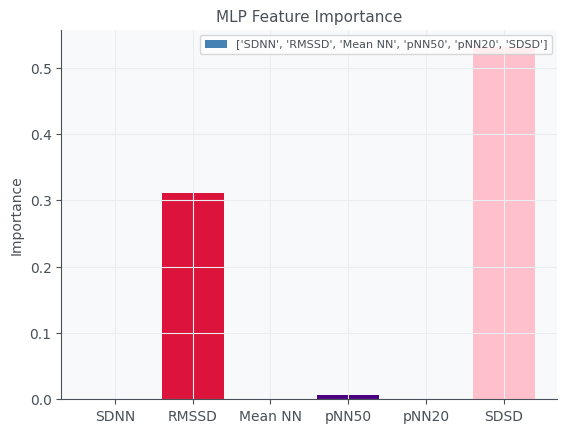

In [137]:
# Perform permutation importance
results = permutation_importance(mlp, X_tr, y_tr, scoring='accuracy')

# Get Importance
importance = results.importances_mean

bar_labels = ['SDNN', 'RMSSD', 'Mean NN', 'pNN50', 'pNN20', 'SDSD']
# Summarize feature importance
for i,v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (bar_labels[i],v))
    
# Plot feature importance

bar_colors = ['steelblue', 'crimson', 'seagreen', 'indigo', 'yellow', 'pink']
plt.bar(bar_labels, importance, label=bar_labels, color=bar_colors)
plt.ylabel('Importance')
plt.title('MLP Feature Importance')
plt.legend()
plt.show()